In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)

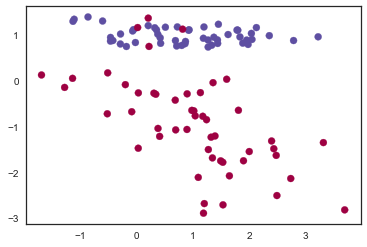

In [3]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [4]:
model = svm.LinearSVC(loss="hinge")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        13
          1       0.92      1.00      0.96        12

avg / total       0.96      0.96      0.96        25



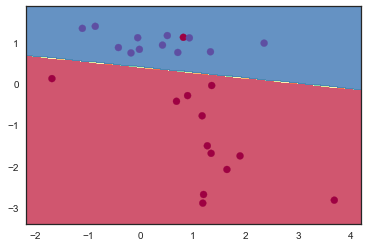

In [5]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.Spectral)